In [6]:
from numpy import reshape
import seaborn as sns
import pandas as pd  
import torch
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
import numpy as np
from IPython.display import display, Audio
import librosa
def ms2samples(time, rate):
    return int((time/1000)*rate)

def samples2ms(sample,rate):
    return int((sample/rate)*1000)
    
def graph_n_play(y,sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)
    plt.show()
    ipd.display(ipd.Audio(y,rate = sr))
def linear_n_play(audio_path):
    # y, sr = sf.read(audio_path)
    y, sr = librosa.load(audio_path, sr=None)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()

In [2]:
la = pd.read_csv('/dataa/Dataset/ADD2023/train/label.txt', sep=' ', header=None)
la.columns = ["utt", "class"]
la.head

<bound method NDFrame.head of                                utt    class
0      ADD2023_T1.2_T_00000000.wav     fake
1      ADD2023_T1.2_T_00000001.wav     fake
2      ADD2023_T1.2_T_00000002.wav     fake
3      ADD2023_T1.2_T_00000003.wav     fake
4      ADD2023_T1.2_T_00000004.wav     fake
...                            ...      ...
27079  ADD2023_T1.2_T_00027079.wav  genuine
27080  ADD2023_T1.2_T_00027080.wav     fake
27081  ADD2023_T1.2_T_00027081.wav     fake
27082  ADD2023_T1.2_T_00027082.wav  genuine
27083  ADD2023_T1.2_T_00027083.wav     fake

[27084 rows x 2 columns]>

In [ ]:
# random split train set


In [42]:
# data=[]
# with open("train_protocol.txt", "r") as f:
#     data = f.readlines()
# with open("train_key.txt", "w") as f:
#     for i in data:
#         key, subset, label = i.strip().split(" ")
#         label = "spoof" if label=="fake" else "bonafide"
#         f.write("- {} - - - {} - {}\n".format(key, label,subset))

In [44]:
train_path = "/dataa/Dataset/ADD2023/train/wav/"

In [45]:
la.loc[la['class'] == "genuine"]

utt    class
4      ADD2023_T1.2_T_00000005.wav  genuine
14     ADD2023_T1.2_T_00000015.wav  genuine
16     ADD2023_T1.2_T_00000017.wav  genuine
20     ADD2023_T1.2_T_00000021.wav  genuine
21     ADD2023_T1.2_T_00000022.wav  genuine
...                            ...      ...
27037  ADD2023_T1.2_T_00027038.wav  genuine
27050  ADD2023_T1.2_T_00027051.wav  genuine
27076  ADD2023_T1.2_T_00027077.wav  genuine
27078  ADD2023_T1.2_T_00027079.wav  genuine
27081  ADD2023_T1.2_T_00027082.wav  genuine

[3012 rows x 2 columns]

/dataa/Dataset/ADD2023/train/wav/ADD2023_T1.2_T_00018273.wav


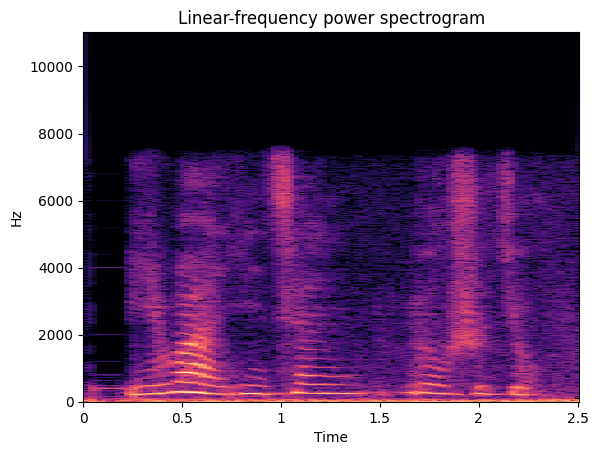

In [4]:
real_file = la.loc[la['class'] == "fake"].sample().values[0][0]
print(train_path+real_file)
linear_n_play(train_path+real_file)

## LFCC feature

In [7]:
import numpy as np
import os
from lfcc import lfcc
import soundfile as sf
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import seaborn as sns
import pandas as pd  

In [8]:
mypath = "./feats/r1_test_lfcc_short"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [5]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]

# for f in tqdm(onlyfiles):
for f in tqdm(onlyfiles):
    # print(f)
    feat = np.load(join(mypath, f)).flatten()
    df = df.append({"utt": f.replace(".npy",".wav"), "feats": feat}, ignore_index=True)
    # print(bio_inp)
df.head

100%|██████████| 55408/55408 [01:01<00:00, 899.45it/s] 


<bound method NDFrame.head of                                utt  \
0      ADD2023_T1.2_T_00025007.wav   
1      ADD2023_T1.2_T_00002873.wav   
2      ADD2023_T1.2_T_00026889.wav   
3      ADD2023_T1.2_T_00003287.wav   
4      ADD2023_T1.2_T_00003627.wav   
...                            ...   
27079  ADD2023_T1.2_T_00018173.wav   
27080  ADD2023_T1.2_T_00000259.wav   
27081  ADD2023_T1.2_T_00010725.wav   
27082  ADD2023_T1.2_T_00012174.wav   
27083  ADD2023_T1.2_T_00026755.wav   

                                                   feats  
0      [-6.292996072366067, 2.8477069006116054, 0.738...  
1      [-7.904327846974981, 3.3328620176273542, 0.636...  
2      [-30.064144720406652, 3.1764684604465434, 1.50...  
3      [-30.107774488812577, 3.5517596109941594, 1.66...  
4      [-6.068217624906615, 2.1431002280170404, 0.998...  
...                                                  ...  
27079  [-6.560935768349209, 2.779557399988245, 1.2218...  
27080  [-27.105133974511755, 2.6876166996

In [6]:
full = la.join(df.set_index('utt'), on="utt", how="inner")
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27084 entries, 0 to 27083
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   utt     27084 non-null  object
 1   class   27084 non-null  object
 2   feats   27084 non-null  object
dtypes: object(3)
memory usage: 846.4+ KB


In [11]:
np.array(full.sample().feats).shape

(1,)

## Clustering

In [14]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn import cluster

import numpy as np
import pandas as pd
import requests
import zipfile

import os
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import hdbscan
import umap
from sklearn.neighbors import KNeighborsTransformer
import pynndescent

import networkx as nx
import cdlib.algorithms as cd

sns.set()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'graph_tool', 'leidenalg', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


In [9]:
X=np.array(full["feats"].to_list())
X.shape

(27084, 300)

In [13]:
%%time
km_labels = cluster.KMeans(n_clusters=2).fit_predict(X)
cl_labels = cluster.AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X)
# sl_labels = cluster.AgglomerativeClustering(n_clusters=111, linkage="single").fit_predict(X)
db_labels = cluster.DBSCAN(eps=0.00001).fit_predict(X)
hd_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100, cluster_selection_epsilon=0.00001).fit_predict(X)

CPU times: user 14min 41s, sys: 4min 41s, total: 19min 23s
Wall time: 12min 53s


In [31]:
from sklearn import decomposition
print("calculating pca")
pca = decomposition.PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

calculating pca


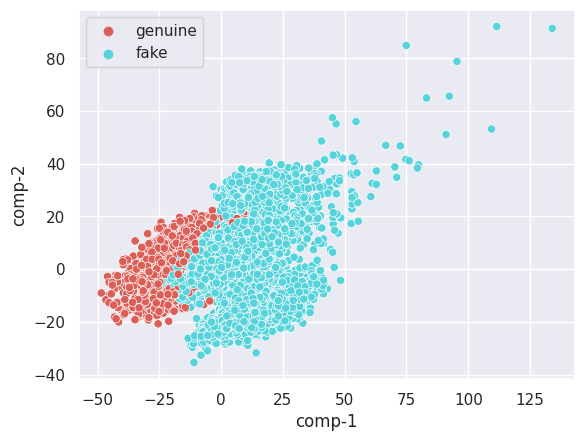

In [32]:
dff = pd.DataFrame()
uniq = np.unique(full['class']).shape[0]
uniq
dff["y"] = full['class']
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="") 
plt.savefig('docs/pca_add_dev_lfcc_short_{}.png'.format("truth_label"),dpi=600)

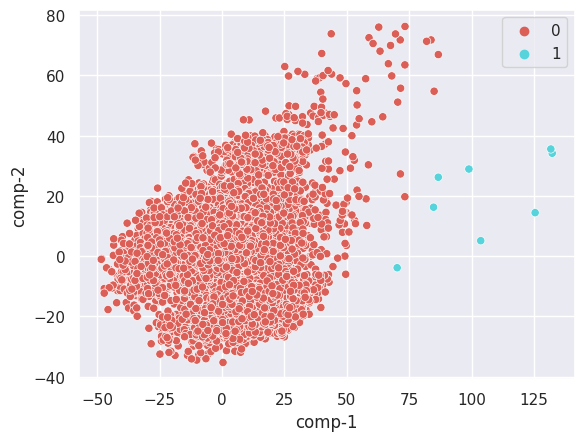

In [22]:
dff = pd.DataFrame()
uniq = np.unique(cl_labels).shape[0]
uniq
dff["y"] = cl_labels
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="") 
plt.savefig('docs/pca_add_train_lfcc_short_{}.png'.format("cl_labels"),dpi=600)

# Check mis-classification


## BTS-E


In [12]:
score_file = "docs/score_add2023_oridev_bio_trans_32concat_aug.txt"

df_dev = pd.read_csv('docs/dev_protocol.txt', sep=' ', header=None)
df_dev.columns = ["utt", "subset", "class"]


df_score = pd.read_csv(score_file, sep=' ', header=None)
df_score.columns = ["utt", "predict"]
df_tmp = df_dev.join(df_score.set_index('utt'), on="utt", how="inner")
df_tmp.info

<bound method DataFrame.info of                                    utt subset     class  predict
0      wav/ADD2023_T1.2_D_00000000.wav    dev     spoof        0
1      wav/ADD2023_T1.2_D_00000001.wav    dev  bonafide        1
2      wav/ADD2023_T1.2_D_00000002.wav    dev     spoof        0
3      wav/ADD2023_T1.2_D_00000003.wav    dev     spoof        0
4      wav/ADD2023_T1.2_D_00000004.wav    dev     spoof        0
...                                ...    ...       ...      ...
28319  wav/ADD2023_T1.2_D_00028319.wav    dev     spoof        0
28320  wav/ADD2023_T1.2_D_00028320.wav    dev     spoof        0
28321  wav/ADD2023_T1.2_D_00028321.wav    dev     spoof        0
28322  wav/ADD2023_T1.2_D_00028322.wav    dev  bonafide        1
28323  wav/ADD2023_T1.2_D_00028323.wav    dev     spoof        0

[28324 rows x 4 columns]>

In [13]:
# False negative
df_fn = df_tmp.loc[(df_tmp['class']=='spoof') & (df_tmp['predict']==1)]
# df_tmp.loc[(df_tmp['predict']==1)]
df_fn

utt subset  class  predict
7338   wav/ADD2023_T1.2_D_00007338.wav    dev  spoof        1
8027   wav/ADD2023_T1.2_D_00008027.wav    dev  spoof        1
13258  wav/ADD2023_T1.2_D_00013258.wav    dev  spoof        1
24124  wav/ADD2023_T1.2_D_00024124.wav    dev  spoof        1
26753  wav/ADD2023_T1.2_D_00026753.wav    dev  spoof        1
27248  wav/ADD2023_T1.2_D_00027248.wav    dev  spoof        1

wav/ADD2023_T1.2_D_00007338.wav


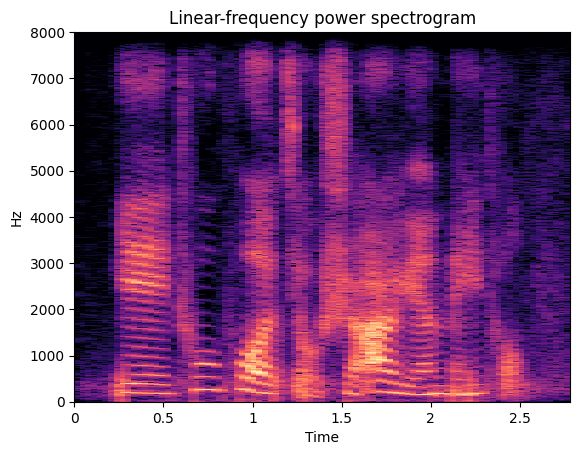

In [19]:
audio_file = df_fn.sample().values[0][0]
print(audio_file)
linear_n_play("/dataa/Dataset/ADD2023/dev/" + audio_file)

In [15]:
# False positive
df_fp = df_tmp.loc[(df_tmp['class']=='bonafide') & (df_tmp['predict']==0)]
df_fp

utt subset     class  predict
1197   wav/ADD2023_T1.2_D_00001197.wav    dev  bonafide        0
5187   wav/ADD2023_T1.2_D_00005187.wav    dev  bonafide        0
6657   wav/ADD2023_T1.2_D_00006657.wav    dev  bonafide        0
6768   wav/ADD2023_T1.2_D_00006768.wav    dev  bonafide        0
7036   wav/ADD2023_T1.2_D_00007036.wav    dev  bonafide        0
9314   wav/ADD2023_T1.2_D_00009314.wav    dev  bonafide        0
9710   wav/ADD2023_T1.2_D_00009710.wav    dev  bonafide        0
10282  wav/ADD2023_T1.2_D_00010282.wav    dev  bonafide        0
12716  wav/ADD2023_T1.2_D_00012716.wav    dev  bonafide        0
13022  wav/ADD2023_T1.2_D_00013022.wav    dev  bonafide        0
13377  wav/ADD2023_T1.2_D_00013377.wav    dev  bonafide        0
16375  wav/ADD2023_T1.2_D_00016375.wav    dev  bonafide        0
18768  wav/ADD2023_T1.2_D_00018768.wav    dev  bonafide        0
19571  wav/ADD2023_T1.2_D_00019571.wav    dev  bonafide        0
21029  wav/ADD2023_T1.2_D_00021029.wav    dev  bonafide        0
26667  wav/ADD2023_T1.2_D_00026667.wav    dev  bonafide        0

wav/ADD2023_T1.2_D_00007036.wav


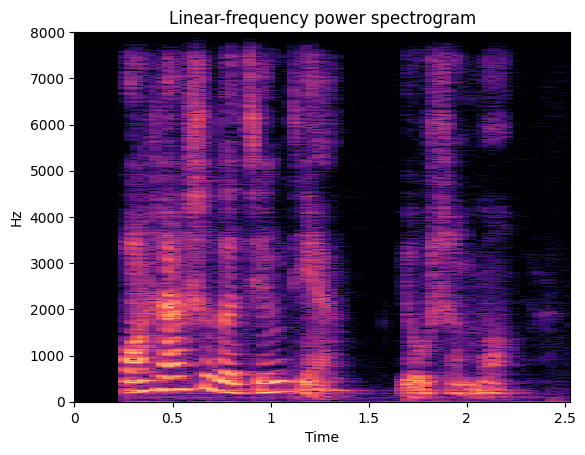

In [20]:
audio_file = df_fp.sample().values[0][0]
print(audio_file)
linear_n_play("/dataa/Dataset/ADD2023/dev/" + audio_file)

# Repartition the ADD2023 set


In [94]:
with open("docs/all_protocol.txt") as f:
    data = f.readlines()


In [95]:
import random
rate = 0.6
random.shuffle(data)
split_index = int(len(data) * rate)
print(split_index)
train_list = data[:split_index]
test_list = data[split_index:]

33244


In [96]:
with open("docs/all_train_protocol.txt", "w") as f:
    f.writelines(train_list)

with open("docs/all_dev_protocol.txt", "w") as f:
    f.writelines(test_list)


In [99]:
import shutil
import os
from tqdm import tqdm

In [100]:
dev_path = "/dataa/Dataset/ADD2023/repartition/dev"
train_path = "/dataa/Dataset/ADD2023/repartition/train"
all_path = "/dataa/Dataset/ADD2023/all"
for i in tqdm(train_list):
    name, _,_=i.split(" ")
    shutil.copy(os.path.join(all_path,name), os.path.join(train_path,name))

for i in tqdm(test_list):
    name, _,_=i.split(" ")
    shutil.copy(os.path.join(all_path,name), os.path.join(dev_path,name))

100%|██████████| 22164/22164 [00:04<00:00, 4898.68it/s]


# check content of dataset


In [101]:
from speechbrain.pretrained.interfaces import foreign_class
asr_model = foreign_class(source="speechbrain/asr-wav2vec2-ctc-aishell",  pymodule_file="custom_interface.py", classname="CustomEncoderDecoderASR", run_opts={"device":"cuda"})
asr_model.transcribe_file("speechbrain/asr-wav2vec2-ctc-aishell/example.wav")

Downloading: 100%|██████████| 2.26k/2.26k [00:00<00:00, 1.62MB/s]
Downloading: 100%|██████████| 4.81k/4.81k [00:00<00:00, 1.90MB/s]
Downloading: 100%|██████████| 110k/110k [00:00<00:00, 287kB/s] 
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 30.9kB/s]
Downloading: 100%|██████████| 212/212 [00:00<00:00, 139kB/s]
Downloading: 100%|██████████| 2.26k/2.26k [00:00<00:00, 1.50MB/s]
Downloading: 100%|██████████| 1.27G/1.27G [06:01<00:00, 3.51MB/s]
Some weights of the model checkpoint at TencentGameMate/chinese-wav2vec2-large were not used when initializing Wav2Vec2Model: ['quantizer.weight_proj.weight', 'quantizer.codevectors', 'quantizer.weight_proj.bias', 'project_hid.weight', 'project_q.weight', 'project_hid.bias', 'project_q.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expecte

['二',
 '零',
 '一',
 '二',
 '年',
 '中',
 '央',
 '进',
 '一',
 '步',
 '加',
 '大',
 '了',
 '资',
 '金',
 '支',
 '持',
 '力',
 '度']

In [102]:
all_path = "/dataa/Dataset/ADD2023/all"
allfiles = [f for f in listdir(all_path) if (isfile(join(all_path, f)) & (".wav" in f))]

with open("docs/all_asr.txt", "w") as f:
    for i in tqdm(allfiles):
        text = asr_model.transcribe_file(join(all_path, i))
        stext = ''.join(text)
        f.write("{}|{}\n".format(i,stext))


  0%|          | 191/55408 [00:11<56:26, 16.31it/s]  


KeyboardInterrupt: 

# Augmentation

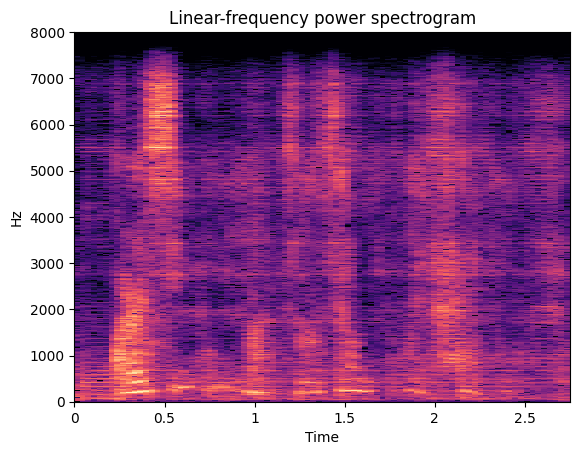

In [5]:
linear_n_play("/dataa/Dataset/ADD2023/train/MelGAN/ADD2023_T1.2_T_00026811.wav")

In [7]:
import shutil
with open("docs/bonafide.txt") as f:
    data = f.readlines()
for i in tqdm(data):
    name, _,_=i.split(" ")
    shutil.copy(name,"/dataa/Dataset/ADD2023/bonafide/")

100%|██████████| 5319/5319 [00:00<00:00, 5838.39it/s]


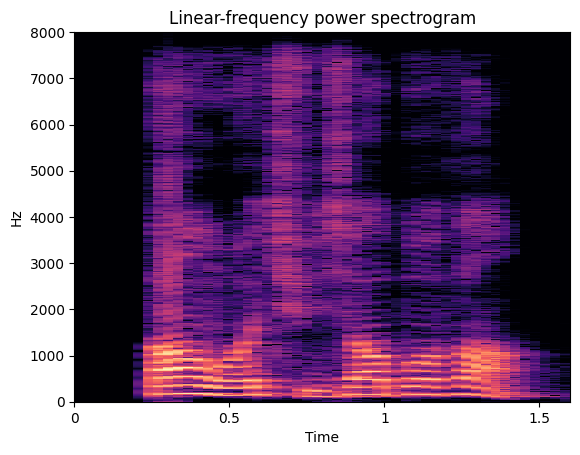

In [8]:
linear_n_play("/dataa/Dataset/ADD2023/bonafide/ADD2023_T1.2_D_00006657.wav")

In [9]:
voco_bona_path = "/dataa/Dataset/ADD2023/aug_train"
voco_dev_path = "/dataa/Dataset/ADD2023/aug_dev/"
with open("docs/aug.txt", "r") as f:
    data = f.readlines()

for i in tqdm(data):
    name, subset, _ = i.split(" ")
    if (subset=="dev"):
        shutil.copy(join(voco_bona_path,name),join(voco_dev_path, name))
    

100%|██████████| 15954/15954 [00:00<00:00, 20927.39it/s]


In [10]:
# generate aug key file
data=[]
with open("docs/aug_dev_protocol.txt", "r") as f:
    data = f.readlines()
with open("docs/aug_dev_key.txt", "w") as f:
    for i in data:
        key, subset, label = i.strip().split(" ")
        # label = "spoof" if label=="fake" else "bonafide"
        f.write("- {} - - - {} - {}\n".format(key, label,subset))

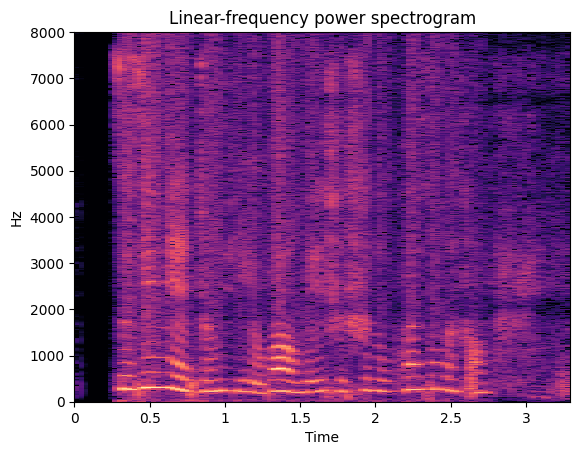

In [4]:
linear_n_play("/dataa/Dataset/ADD2023/aug_train/RawBoost/ADD2023_T1.2_T_00000002.wav")

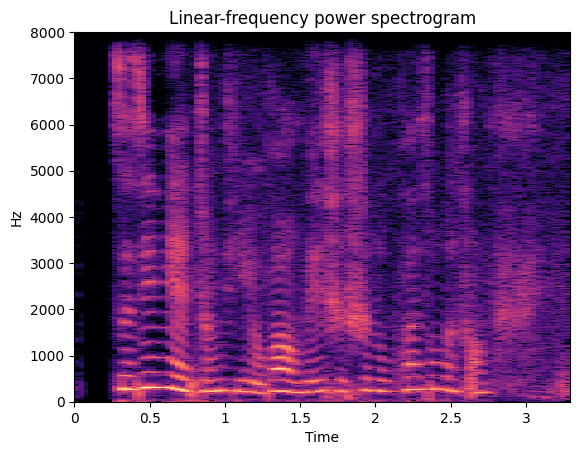

In [5]:
linear_n_play("/dataa/Dataset/ADD2023/train/wav/ADD2023_T1.2_T_00000002.wav")

# make new training data


## VAD Error

In [30]:
# train vad error

train_vad_err = pd.read_csv("docs/train_VAD_error.txt", sep=' ', header=None)
train_vad_err.columns = ["utt"]
train_vad_err["vade"] = 1
train_vad_err.head

<bound method NDFrame.head of                               utt  vade
0     ADD2023_T1.2_T_00012966.wav     1
1     ADD2023_T1.2_T_00011857.wav     1
2     ADD2023_T1.2_T_00008681.wav     1
3     ADD2023_T1.2_T_00021328.wav     1
4     ADD2023_T1.2_T_00017758.wav     1
...                           ...   ...
2621  ADD2023_T1.2_T_00003046.wav     1
2622  ADD2023_T1.2_T_00013689.wav     1
2623  ADD2023_T1.2_T_00017059.wav     1
2624  ADD2023_T1.2_T_00004404.wav     1
2625  ADD2023_T1.2_T_00006911.wav     1

[2626 rows x 2 columns]>

In [31]:
# train 
train_proto = pd.read_csv("docs/train_protocol.txt", sep=' ', header=None)
train_proto.columns = ["utt", "subset", "class"]
train_proto.head


<bound method NDFrame.head of                                utt subset     class
0      ADD2023_T1.2_T_00000000.wav  train     spoof
1      ADD2023_T1.2_T_00000001.wav  train     spoof
2      ADD2023_T1.2_T_00000002.wav  train     spoof
3      ADD2023_T1.2_T_00000003.wav  train     spoof
4      ADD2023_T1.2_T_00000004.wav  train     spoof
...                            ...    ...       ...
27079  ADD2023_T1.2_T_00027079.wav  train  bonafide
27080  ADD2023_T1.2_T_00027080.wav  train     spoof
27081  ADD2023_T1.2_T_00027081.wav  train     spoof
27082  ADD2023_T1.2_T_00027082.wav  train  bonafide
27083  ADD2023_T1.2_T_00027083.wav  train     spoof

[27084 rows x 3 columns]>

In [32]:
merged = train_proto.join(train_vad_err.set_index('utt'), on="utt", how="inner")

In [34]:
merged.loc[(merged['vade']==1) & (merged['class']=='spoof')]

utt subset  class  vade
16     ADD2023_T1.2_T_00000016.wav  train  spoof     1
31     ADD2023_T1.2_T_00000031.wav  train  spoof     1
46     ADD2023_T1.2_T_00000046.wav  train  spoof     1
49     ADD2023_T1.2_T_00000049.wav  train  spoof     1
61     ADD2023_T1.2_T_00000061.wav  train  spoof     1
...                            ...    ...    ...   ...
27047  ADD2023_T1.2_T_00027047.wav  train  spoof     1
27050  ADD2023_T1.2_T_00027050.wav  train  spoof     1
27053  ADD2023_T1.2_T_00027053.wav  train  spoof     1
27058  ADD2023_T1.2_T_00027058.wav  train  spoof     1
27071  ADD2023_T1.2_T_00027071.wav  train  spoof     1

[2626 rows x 4 columns]

In [38]:
# dev vad error

dev_vad_err = pd.read_csv("docs/dev_VAD_error.txt", sep=' ', header=None)
dev_vad_err.columns = ["utt"]
dev_vad_err["vade"] = 1
dev_vad_err.head

<bound method NDFrame.head of                               utt  vade
0     ADD2023_T1.2_D_00022863.wav     1
1     ADD2023_T1.2_D_00004949.wav     1
2     ADD2023_T1.2_D_00016043.wav     1
3     ADD2023_T1.2_D_00026906.wav     1
4     ADD2023_T1.2_D_00014872.wav     1
...                           ...   ...
2231  ADD2023_T1.2_D_00026542.wav     1
2232  ADD2023_T1.2_D_00019574.wav     1
2233  ADD2023_T1.2_D_00023155.wav     1
2234  ADD2023_T1.2_D_00019170.wav     1
2235  ADD2023_T1.2_D_00001271.wav     1

[2236 rows x 2 columns]>

In [45]:
# dev 
dev_proto = pd.read_csv("docs/dev_protocol.txt", sep=' ', header=None)
dev_proto.columns = ["utt", "subset", "class"]
dev_proto.head


<bound method NDFrame.head of                                utt subset     class
0      ADD2023_T1.2_D_00000000.wav    dev     spoof
1      ADD2023_T1.2_D_00000001.wav    dev  bonafide
2      ADD2023_T1.2_D_00000002.wav    dev     spoof
3      ADD2023_T1.2_D_00000003.wav    dev     spoof
4      ADD2023_T1.2_D_00000004.wav    dev     spoof
...                            ...    ...       ...
28319  ADD2023_T1.2_D_00028319.wav    dev     spoof
28320  ADD2023_T1.2_D_00028320.wav    dev     spoof
28321  ADD2023_T1.2_D_00028321.wav    dev     spoof
28322  ADD2023_T1.2_D_00028322.wav    dev  bonafide
28323  ADD2023_T1.2_D_00028323.wav    dev     spoof

[28324 rows x 3 columns]>

In [46]:
merged = dev_proto.join(dev_vad_err.set_index('utt'), on="utt", how="inner")

In [48]:
merged.loc[(merged['vade']==1) & (merged['class']=='spoof')]

utt subset  class  vade
6      ADD2023_T1.2_D_00000006.wav    dev  spoof     1
9      ADD2023_T1.2_D_00000009.wav    dev  spoof     1
18     ADD2023_T1.2_D_00000018.wav    dev  spoof     1
23     ADD2023_T1.2_D_00000023.wav    dev  spoof     1
34     ADD2023_T1.2_D_00000034.wav    dev  spoof     1
...                            ...    ...    ...   ...
28298  ADD2023_T1.2_D_00028298.wav    dev  spoof     1
28313  ADD2023_T1.2_D_00028313.wav    dev  spoof     1
28314  ADD2023_T1.2_D_00028314.wav    dev  spoof     1
28318  ADD2023_T1.2_D_00028318.wav    dev  spoof     1
28321  ADD2023_T1.2_D_00028321.wav    dev  spoof     1

[2236 rows x 4 columns]

## 

# Round 1 Test

## Walk around

In [2]:
mypath = "/dataa/Dataset/ADD2023/R2_test/t12r2test/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
onlyfiles[0]

'ADD2023_T1.2R2_E_00008841.wav'

In [9]:
with open("docs/R2_test_protocol.txt", "w") as f:
    for i in onlyfiles:
        f.write("t12r2test/{} test -\n".format(i))

In [9]:
mypath = "./feats/r1_test_lfcc_short/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [10]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]

# for f in tqdm(onlyfiles):
for f in tqdm(onlyfiles):
    # print(f)
    feat = np.load(join(mypath, f)).flatten()
    df = df.append({"utt": f.replace(".npy",".wav"), "feats": feat}, ignore_index=True)
    # print(bio_inp)
df.head

100%|██████████| 111976/111976 [06:33<00:00, 284.86it/s]


<bound method NDFrame.head of                                   utt  \
0       ADD2023_T1.2R1_E_00056039.wav   
1       ADD2023_T1.2R1_E_00037569.wav   
2       ADD2023_T1.2R1_E_00033234.wav   
3       ADD2023_T1.2R1_E_00102862.wav   
4       ADD2023_T1.2R1_E_00064230.wav   
...                               ...   
111971  ADD2023_T1.2R1_E_00052335.wav   
111972  ADD2023_T1.2R1_E_00028328.wav   
111973  ADD2023_T1.2R1_E_00000478.wav   
111974  ADD2023_T1.2R1_E_00010687.wav   
111975  ADD2023_T1.2R1_E_00038955.wav   

                                                    feats  
0       [-85.73812726998668, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1       [-85.73812726998668, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2       [-85.73812726998668, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3       [-38.369767990272585, 0.3488845621648662, 0.33...  
4       [-85.73812726998668, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                   ...  
111971  [-85.73812726998668, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [11]:
X=np.array(df["feats"].to_list())
X.shape

(111976, 300)

In [12]:
from sklearn import decomposition
print("calculating pca")
pca = decomposition.PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

calculating pca


/tmp/ipykernel_30023/2130574745.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="comp-1", y="comp-2",


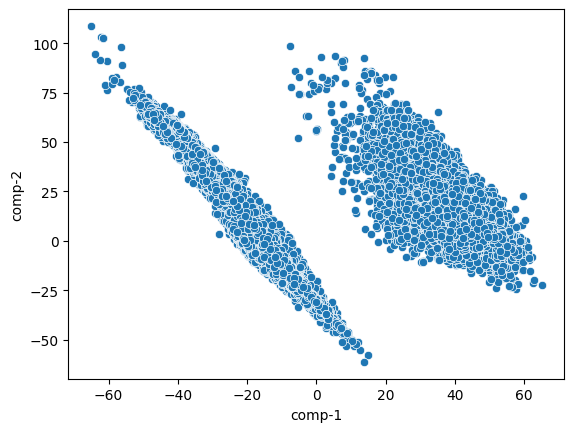

In [13]:
dff = pd.DataFrame()
# uniq = np.unique(cl_labels).shape[0]
# uniq
# dff["y"] = cl_labels
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 1),
                
                data=dff).set(title="") 
plt.savefig('docs/pca_add_train_lfcc_short_{}.png'.format("R1_test"),dpi=600)

In [15]:
%%time
km_labels = cluster.KMeans(n_clusters=2).fit_predict(X)
cl_labels = cluster.AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X)
# sl_labels = cluster.AgglomerativeClustering(n_clusters=111, linkage="single").fit_predict(X)
db_labels = cluster.DBSCAN(eps=0.00001).fit_predict(X)
hd_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100, cluster_selection_epsilon=0.00001).fit_predict(X)

CPU times: user 3h 27min 1s, sys: 1h 28min 37s, total: 4h 55min 39s
Wall time: 3h 27min 47s


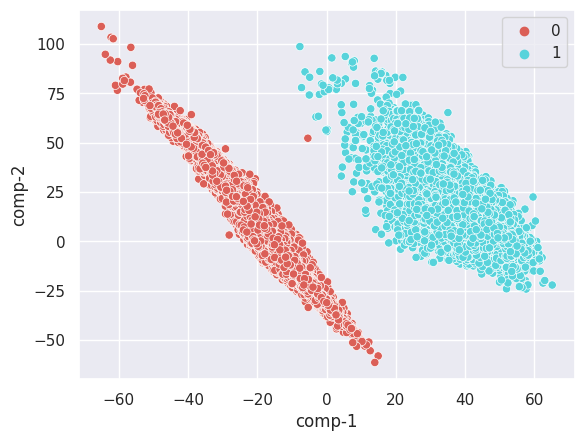

In [17]:
dff = pd.DataFrame()
uniq = np.unique(km_labels).shape[0]
uniq
dff["y"] = km_labels
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="")
plt.savefig('docs/pca_t12r1test_train_lfcc_short_{}.png'.format("km_labels"),dpi=600)

In [42]:
type(km_labels)

numpy.ndarray

## Prediction combination


In [181]:
# load predict label from SSL
score_file = "docs/score_add2023_t12r1test_ssl_aug.txt"
df_ssl = pd.read_csv(score_file, sep=' ', header=None)
df_ssl.columns = ["utt", "ssl"]
df_ssl.head

<bound method NDFrame.head of                                   utt  ssl
0       ADD2023_T1.2R1_E_00076472.wav    0
1       ADD2023_T1.2R1_E_00007120.wav    1
2       ADD2023_T1.2R1_E_00027294.wav    1
3       ADD2023_T1.2R1_E_00005554.wav    1
4       ADD2023_T1.2R1_E_00043479.wav    0
...                               ...  ...
111971  ADD2023_T1.2R1_E_00071342.wav    1
111972  ADD2023_T1.2R1_E_00062429.wav    1
111973  ADD2023_T1.2R1_E_00084527.wav    0
111974  ADD2023_T1.2R1_E_00035132.wav    1
111975  ADD2023_T1.2R1_E_00072018.wav    0

[111976 rows x 2 columns]>

In [182]:
# load predict label from BTS-E
score_file = "docs/score_add2023_t12r1test_bio_trans_32concat_aug.txt"
df_bts = pd.read_csv(score_file, sep=' ', header=None)
df_bts.columns = ["utt", "bts"]
df_bts.head

<bound method NDFrame.head of                                   utt  bts
0       ADD2023_T1.2R1_E_00076472.wav    0
1       ADD2023_T1.2R1_E_00007120.wav    0
2       ADD2023_T1.2R1_E_00027294.wav    1
3       ADD2023_T1.2R1_E_00005554.wav    1
4       ADD2023_T1.2R1_E_00043479.wav    1
...                               ...  ...
111971  ADD2023_T1.2R1_E_00071342.wav    1
111972  ADD2023_T1.2R1_E_00062429.wav    0
111973  ADD2023_T1.2R1_E_00084527.wav    0
111974  ADD2023_T1.2R1_E_00035132.wav    1
111975  ADD2023_T1.2R1_E_00072018.wav    0

[111976 rows x 2 columns]>

In [183]:
score_file = "docs/score_add2023_t12r1test_trim_ssl_aug.txt"
df_ssl_trim = pd.read_csv(score_file, sep=' ', header=None)
df_ssl_trim.columns = ["utt", "ssl_trim"]
df_ssl_trim.head

<bound method NDFrame.head of                                   utt  ssl_trim
0       ADD2023_T1.2R1_E_00076472.wav         1
1       ADD2023_T1.2R1_E_00007120.wav         1
2       ADD2023_T1.2R1_E_00027294.wav         1
3       ADD2023_T1.2R1_E_00005554.wav         1
4       ADD2023_T1.2R1_E_00043479.wav         0
...                               ...       ...
111971  ADD2023_T1.2R1_E_00071342.wav         1
111972  ADD2023_T1.2R1_E_00062429.wav         1
111973  ADD2023_T1.2R1_E_00084527.wav         0
111974  ADD2023_T1.2R1_E_00035132.wav         1
111975  ADD2023_T1.2R1_E_00072018.wav         1

[111976 rows x 2 columns]>

In [184]:

# join together
score_full = df_ssl.join(df_bts.set_index('utt'), on="utt", how="inner")
score_full = score_full.join(df_ssl_trim.set_index('utt'), on="utt", how="inner")
score_full.head

<bound method NDFrame.head of                                   utt  ssl  bts  ssl_trim
0       ADD2023_T1.2R1_E_00076472.wav    0    0         1
1       ADD2023_T1.2R1_E_00007120.wav    1    0         1
2       ADD2023_T1.2R1_E_00027294.wav    1    1         1
3       ADD2023_T1.2R1_E_00005554.wav    1    1         1
4       ADD2023_T1.2R1_E_00043479.wav    0    1         0
...                               ...  ...  ...       ...
111971  ADD2023_T1.2R1_E_00071342.wav    1    1         1
111972  ADD2023_T1.2R1_E_00062429.wav    1    0         1
111973  ADD2023_T1.2R1_E_00084527.wav    0    0         0
111974  ADD2023_T1.2R1_E_00035132.wav    1    1         1
111975  ADD2023_T1.2R1_E_00072018.wav    0    0         1

[111976 rows x 4 columns]>

In [185]:
score_full.loc[score_full["ssl"]!=score_full["ssl_trim"]]

utt  ssl  bts  ssl_trim
0       ADD2023_T1.2R1_E_00076472.wav    0    0         1
11      ADD2023_T1.2R1_E_00045275.wav    0    0         1
38      ADD2023_T1.2R1_E_00065153.wav    0    0         1
48      ADD2023_T1.2R1_E_00028364.wav    0    0         1
60      ADD2023_T1.2R1_E_00026254.wav    1    1         0
...                               ...  ...  ...       ...
111928  ADD2023_T1.2R1_E_00081355.wav    0    0         1
111943  ADD2023_T1.2R1_E_00048714.wav    0    1         1
111946  ADD2023_T1.2R1_E_00080271.wav    1    1         0
111955  ADD2023_T1.2R1_E_00109431.wav    0    0         1
111975  ADD2023_T1.2R1_E_00072018.wav    0    0         1

[10800 rows x 4 columns]

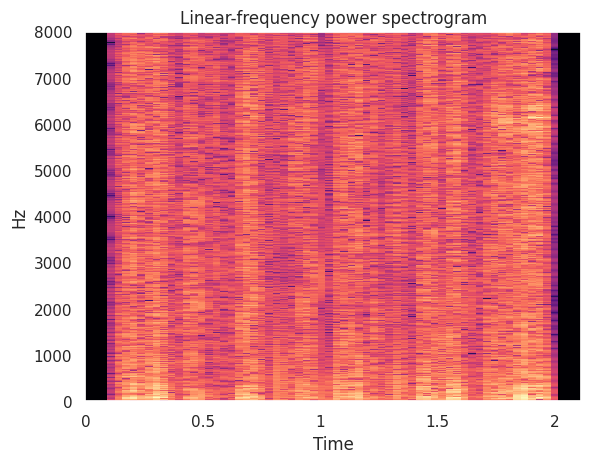

In [102]:
linear_n_play("/dataa/Dataset/ADD2023/R1_test/t12r1test/ADD2023_T1.2R1_E_00028249.wav")

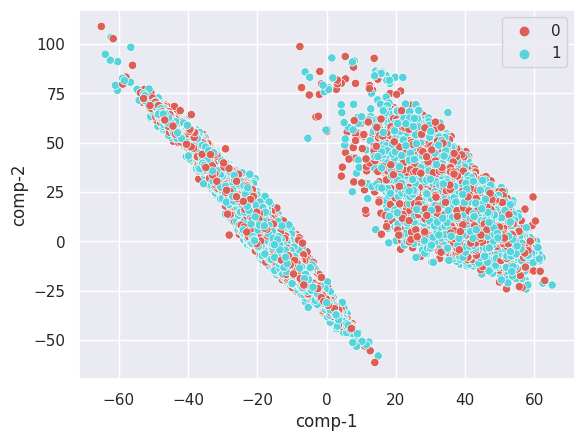

In [40]:
dff = pd.DataFrame()
uniq = np.unique(score_full["ssl"]).shape[0]
uniq
dff["y"] = score_full["ssl"]
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="")
plt.savefig('docs/pca_add_train_lfcc_short_{}.png'.format("ssl_res"),dpi=600)

In [43]:
# add km label to new column of full score
score_full["km_labels"] = km_labels.tolist()

In [70]:
score_full.loc[(score_full["ssl"]!=score_full["km_labels"]) & (score_full["ssl"]==score_full["bts"]) & (score_full["ssl"]==1)]

utt  ssl  bts  km_labels
2       t12r1test/ADD2023_T1.2R1_E_00027294.wav    1    1          0
5       t12r1test/ADD2023_T1.2R1_E_00097826.wav    1    1          0
6       t12r1test/ADD2023_T1.2R1_E_00032582.wav    1    1          0
7       t12r1test/ADD2023_T1.2R1_E_00100710.wav    1    1          0
9       t12r1test/ADD2023_T1.2R1_E_00022534.wav    1    1          0
...                                         ...  ...  ...        ...
111966  t12r1test/ADD2023_T1.2R1_E_00086075.wav    1    1          0
111967  t12r1test/ADD2023_T1.2R1_E_00080066.wav    1    1          0
111968  t12r1test/ADD2023_T1.2R1_E_00036538.wav    1    1          0
111971  t12r1test/ADD2023_T1.2R1_E_00071342.wav    1    1          0
111974  t12r1test/ADD2023_T1.2R1_E_00035132.wav    1    1          0

[36253 rows x 4 columns]

In [186]:
score_full["matched"] = np.where((score_full['ssl']==score_full['bts'])&(score_full['ssl']==score_full['ssl_trim']), score_full['ssl_trim'], -1)


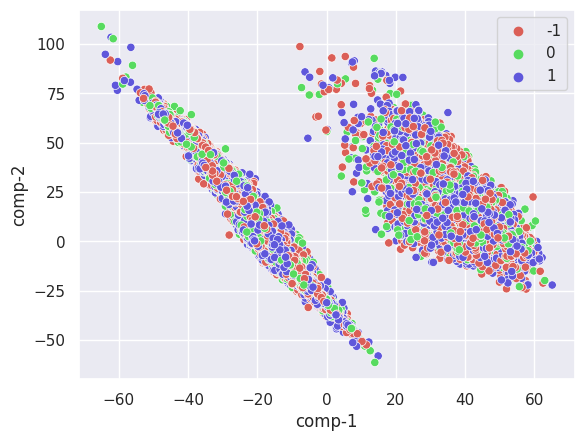

In [187]:
dff = pd.DataFrame()
uniq = np.unique(score_full["matched"]).shape[0]
uniq
dff["y"] = score_full["matched"]
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="")
plt.savefig('docs/pca_add_train_lfcc_short_{}.png'.format("matched"),dpi=600)

                                 utt  ssl  bts  ssl_trim  matched
30121  ADD2023_T1.2R1_E_00081979.wav    0    1         0       -1


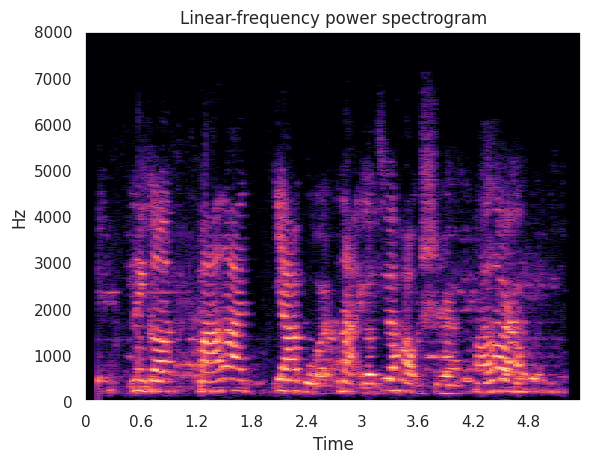

In [189]:
rand = score_full.loc[score_full["matched"]==-1].sample().values[0][0]
print(score_full.loc[score_full["utt"]==rand])
linear_n_play("/dataa/Dataset/ADD2023/R1_test/t12r1test/"+rand)

In [193]:
score_full.loc[(score_full["matched"]==-1)&(score_full["ssl"]==score_full["bts"])]

utt  ssl  bts  ssl_trim  matched
0       ADD2023_T1.2R1_E_00076472.wav    0    0         1       -1
11      ADD2023_T1.2R1_E_00045275.wav    0    0         1       -1
38      ADD2023_T1.2R1_E_00065153.wav    0    0         1       -1
48      ADD2023_T1.2R1_E_00028364.wav    0    0         1       -1
60      ADD2023_T1.2R1_E_00026254.wav    1    1         0       -1
...                               ...  ...  ...       ...      ...
111919  ADD2023_T1.2R1_E_00057338.wav    0    0         1       -1
111928  ADD2023_T1.2R1_E_00081355.wav    0    0         1       -1
111946  ADD2023_T1.2R1_E_00080271.wav    1    1         0       -1
111955  ADD2023_T1.2R1_E_00109431.wav    0    0         1       -1
111975  ADD2023_T1.2R1_E_00072018.wav    0    0         1       -1

[5109 rows x 5 columns]

## score level fusion

In [194]:
# load ssl and bts-e score
# load predict label from SSL
score_file = "docs/add2023_t12r1test_trim_ssl_aug.txt"
df_ssl = pd.read_csv(score_file, sep=' ', header=None)
df_ssl.columns = ["utt", "ssl"]
df_ssl.head

# load predict label from BTS-E
score_file = "docs/add2023_t12r1test_bio_trans_32concat_aug.txt"
df_bts = pd.read_csv(score_file, sep=' ', header=None)
df_bts.columns = ["utt", "bts"]
df_bts.head

<bound method NDFrame.head of                                   utt        bts
0       ADD2023_T1.2R1_E_00076472.wav  -1.335313
1       ADD2023_T1.2R1_E_00007120.wav  -5.744022
2       ADD2023_T1.2R1_E_00027294.wav  -0.678914
3       ADD2023_T1.2R1_E_00005554.wav  -0.000203
4       ADD2023_T1.2R1_E_00043479.wav  -0.000347
...                               ...        ...
111971  ADD2023_T1.2R1_E_00071342.wav  -0.426835
111972  ADD2023_T1.2R1_E_00062429.wav  -6.409925
111973  ADD2023_T1.2R1_E_00084527.wav -10.016248
111974  ADD2023_T1.2R1_E_00035132.wav  -0.494168
111975  ADD2023_T1.2R1_E_00072018.wav  -2.717674

[111976 rows x 2 columns]>

In [195]:
df_fuse = df_ssl.join(df_bts.set_index('utt'), on="utt", how="inner")

In [200]:
df_fuse["fused"] = 0.7*df_fuse["ssl"] + 0.3*df_fuse["bts"]

In [201]:
df_fuse.to_csv("docs/add2023_t12r1test_trim_nontrim_fused_aug_73.txt", sep=" ",columns=["utt", "fused"],index=False, header=False)

# Analyze the trimmed data

In [8]:
# copy files that cannot be trimmed to new dataset
import shutil
import os
data = []
with open("docs/R2_test_VAD_error.txt") as f:
    data = f.readlines()
for file in tqdm(data):
    file = file.strip()
    shutil.copy(os.path.join("/dataa/Dataset/ADD2023/R2_test",file),
                os.path.join("/dataa/Dataset/ADD2023/R2_test/trim",file.replace("t12r2test/","")))

100%|██████████| 3358/3358 [00:16<00:00, 207.46it/s]


                                           utt  ssl  bts  km_labels  matched
54358  t12r1test/ADD2023_T1.2R1_E_00022908.wav    0    0          0        0


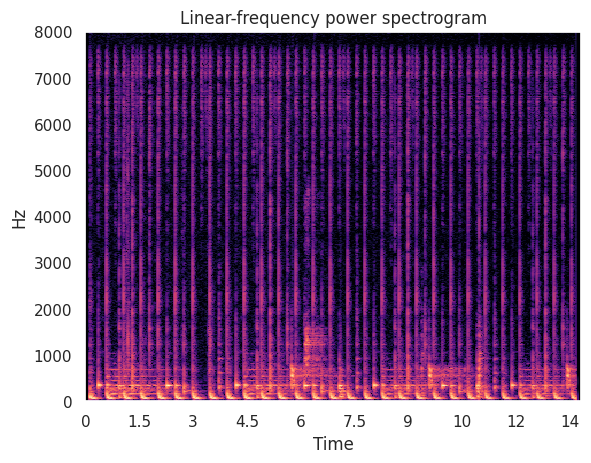

In [108]:
# Music?
sam = "ADD2023_T1.2R1_E_00022908.wav"
print(score_full.loc[score_full["utt"]=="t12r1test/"+sam])
linear_n_play("/dataa/Dataset/ADD2023/R1_test/t12r1test/"+sam)

In [ ]:
# Music?
sam = "ADD2023_T1.2R1_E_00022908.wav"
print(score_full.loc[score_full["utt"]=="t12r1test/"+sam])
linear_n_play("/dataa/Dataset/ADD2023/R1_test/t12r1test/"+sam)

### VAD error list


In [10]:
vad_eer_file = "docs/R2_test_VAD_error.txt"
df_vad_err = pd.read_csv(vad_eer_file, sep=' ', header=None)
df_vad_err.columns = ["utt"]
df_vad_err["vade"] = 1
df_vad_err.head

<bound method NDFrame.head of                                           utt  vade
0     t12r2test/ADD2023_T1.2R2_E_00080511.wav     1
1     t12r2test/ADD2023_T1.2R2_E_00106082.wav     1
2     t12r2test/ADD2023_T1.2R2_E_00099624.wav     1
3     t12r2test/ADD2023_T1.2R2_E_00068416.wav     1
4     t12r2test/ADD2023_T1.2R2_E_00030254.wav     1
...                                       ...   ...
3353  t12r2test/ADD2023_T1.2R2_E_00022810.wav     1
3354  t12r2test/ADD2023_T1.2R2_E_00075403.wav     1
3355  t12r2test/ADD2023_T1.2R2_E_00097571.wav     1
3356  t12r2test/ADD2023_T1.2R2_E_00065214.wav     1
3357  t12r2test/ADD2023_T1.2R2_E_00070389.wav     1

[3358 rows x 2 columns]>

t12r2test/ADD2023_T1.2R2_E_00080542.wav


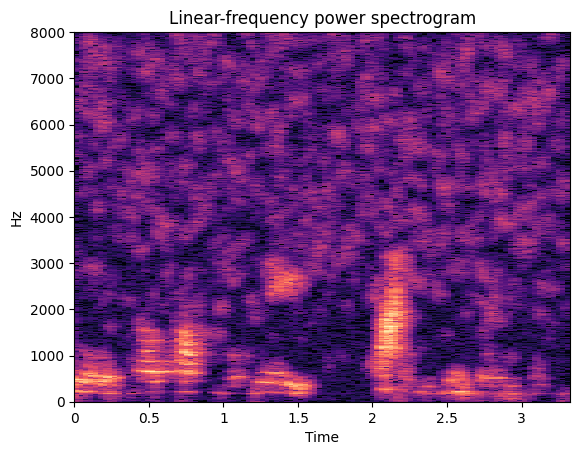

In [28]:
sam=df_vad_err.sample().values[0][0]
print(sam)
linear_n_play("/dataa/Dataset/ADD2023/R2_test/trim_denoise_2/"+sam.replace("t12r2test/",""))

In [177]:
# rand = df_err.loc[(df_err["vade"]==1) & (df_err["matched"]==2) & (df_err["bts"]==0)].sample().values[0][0]
# print(df_err.loc[df_err["utt"]==rand])
# linear_n_play("/dataa/Dataset/ADD2023/R1_test/"+rand)
rand = score_full.loc[(score_full["vade"]==1) & (score_full["matched"]==2) & (score_full["bts"]==0)]
rand

utt  ssl  bts  km_labels  matched  \
6272   t12r1test/ADD2023_T1.2R1_E_00038270.wav    1    0          0        2   
29737  t12r1test/ADD2023_T1.2R1_E_00026306.wav    1    0          0        2   
49513  t12r1test/ADD2023_T1.2R1_E_00058553.wav    1    0          1        2   
61340  t12r1test/ADD2023_T1.2R1_E_00061427.wav    1    0          0        2   
85224  t12r1test/ADD2023_T1.2R1_E_00046958.wav    1    0          0        2   

       vade  
6272    1.0  
29737   1.0  
49513   1.0  
61340   1.0  
85224   1.0